In [5]:
from sklearn import svm
import csv
import os,sys,re
import numpy as np
import random
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [6]:
def read_csv(filepath):
    csv_data = []
    with open(filepath,'r',encoding = 'utf-16') as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            csv_data.append(' '.join(row))
    return csv_data

In [7]:
def clean(text):

    text = re.sub(r'[^\x00-\x7F]+',' ', text)
    text = str.replace(text,',',' ')
    text = str.replace(text,"'",' ')
    text = str.replace(text,'"',' ')
    text = str.replace(text,'!',' ')
    text = str.replace(text,'^',' ')
    text = str.replace(text,'(',' ')
    text = str.replace(text,')',' ')
    text = str.replace(text,'%',' ')
    text = str.replace(text,'-',' ')
    text = str.replace(text,'_',' ')
    text = str.replace(text,'|',' ')
    text = str.replace(text,'.',' ')
    text = str.replace(text,':',' ')
    #text = str.replace(text,'@',' ')
    text = str.replace(text,'\n',' ')
    #text = str.replace(text,'#',' ');
    #text = ' '.join(re.sub("(@[A-Za-z0-9+])|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())

In [8]:
    text = re.sub('\s+', ' ',text).strip()
    text = text.split(' ')
    new_text = []
    for each in text:
        if(str.find(each,'http') != -1):
            continue
        if not each.isalnum():
            continue
        new_text.append(str.lower(each))
    text = ' '.join(new_text)

NameError: name 'text' is not defined

In [9]:
return text

SyntaxError: 'return' outside function (2405540433.py, line 1)

In [10]:
def build_vocab(list_text):
    words_vocab = []
    for t in list_text:
        for w in t.split(' '):
            words_vocab.append(w)
    return list(set(words_vocab))

In [11]:
def write_vocab(vocab,vocab_path):
    try:
        file = open(vocab_path, 'w',encoding = 'utf-16')
        for idx,item in enumerate(vocab):
            file.write(str(idx)+'\t')
            file.write("%s\n" % item)
        file.close()

SyntaxError: unexpected EOF while parsing (1334175925.py, line 7)

In [12]:
    except Exception as e:
        print(e)
        print("can't open file" + vocab_path)

SyntaxError: invalid syntax (2918994984.py, line 1)

In [13]:
def read_vocab(vocab_path):
    #try:
        with open(vocab_path) as f:
            vocab = f.readlines()
            vocab = [x.split('\t')[1].replace('\n','') for x in vocab] 
            return vocab

In [14]:
def write_index(text_list,vocab_list,input_path,keep_num):
    #vocab = read_vocab(vocab_path)
    vocab = vocab_list
    btm_input = open(input_path,'w')
    train_data = []    
    for t in text_list:
        text_index = []
        for w in t.split(' '):
            #print(w)
            if w in vocab:  ###if the word is a new vocab, ignore it
                btm_input.write(str(vocab.index(w))+' ')
                text_index.append(int(vocab.index(w)))
        if len(text_index) >= keep_num:
            text_index = text_index[:keep_num]
        else:
            text_index += [0 for i in range(keep_num - len(text_index))]
        btm_input.write('\n')
        train_data.append(text_index)
        
    btm_input.close()
    return train_data



In [15]:
def convert_index_to_vector(train_data,vocab_list,keep_num):
    #vocab = read_vocab(vocab_path)
    vocab = vocab_list
    train_vec = []
    for data in train_data:
        data_vec = []
        for count in range(keep_num):
            vec = [0 for i in vocab]
            if count < len(data):
                vec[int(data[count])] = 1
            data_vec.append(vec)
        train_vec.append(data_vec)
    return np.array(train_vec)

In [16]:
def get_average_length(drug_dealer,online,other):
    total_length = 0
    for text in drug_dealer:
        total_length += len(text)
        
    for text in online:
        total_length += len(text)
                            
    for text in other:
        total_length += len(text)
        
    return int(total_length/(len(drug_dealer)+len(online)+len(other)))


In [17]:
def plot_graph(train,vali,label):
    plt.plot(range(len(train)),train,label='train_'+label)
    plt.plot(range(len(vali)),vali,label='vali_'+label)
    if label == 'loss':
        plt.legend(loc='upper right')
    if label == 'acc':
        plt.legend(loc='lower right')
    plt.show()

In [18]:
def get_hashtag(text):
    hashtag = [tag for tag in text.replace('#',' #').split(' ') if tag.startswith("#")]
    return hashtag

In [19]:
def shuffle_data(test_index,test_label):
    test_list = list(zip(test_index,test_label))
    random.shuffle(test_list)
    test = list(zip(*test_list))
    test_index = test[0]
    test_label = test[1]
    return test_index,test_label


In [20]:
total_data = read_csv('./data/combined_result.csv')
test_data = [t.split('\t') for t in total_data]

FileNotFoundError: [Errno 2] No such file or directory: './data/combined_result.csv'

In [21]:
test_label = [int(t[2]) for t in test_data[1:]]
test_list = [t[0] for t in test_data[1:]]
test_list,test_label = shuffle_data(test_list,test_label)

NameError: name 'test_data' is not defined

In [22]:
text_list = [clean(t[0]) for t in test_data[1:]]

NameError: name 'test_data' is not defined

In [23]:
hashtag_list = [' '.join(get_hashtag(t[0])) for t in test_data[1:]]


NameError: name 'test_data' is not defined

In [24]:
vocab_list = build_vocab(test_list)
write_vocab(vocab_list,'test_vocab.txt')

NameError: name 'test_list' is not defined

In [25]:
total_index = write_index(test_list,vocab_list,'test_data.txt',50)
text_index = write_index(text_list,vocab_list,'text_data.txt',50)
hashtag_index = write_index(hashtag_list,vocab_list,'hashtag_data.txt',15)

NameError: name 'test_list' is not defined

In [26]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.utils.vis_utils import plot_model

ModuleNotFoundError: No module named 'keras'

In [27]:
def train_model(text_train_data,hashtag_train_data,train_label,vocab_list,text_keep_num,hashtag_keep_num):    
    Adam = keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    SGD = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    Ada = keras.optimizers.Adagrad(lr=0.0004, epsilon=None, decay=0.0)

In [28]:
text_block = Sequential()
    text_block.add(Embedding(len(vocab_list), 400, input_length = text_keep_num))
    text_block.add(LSTM(800, dropout=0.2, recurrent_dropout=0.2))
    text_block.add(Dense(200, activation='sigmoid'))

IndentationError: unexpected indent (898718671.py, line 2)

In [29]:
 hashtag_block = Sequential()
    hashtag_block.add(Embedding(len(vocab_list), 400, input_length = hash_keep_num))
    hashtag_block.add(Flatten())
    hashtag_block.add(Dense(200, activation='sigmoid'))

IndentationError: unexpected indent (3338126474.py, line 2)

In [30]:
merged = Concatenate([text_block, hashtag_block])
    merged.add(Dense(200, activation='sigmoid'))
    merged.add(Dense(1, activation='sigmoid'))
    merged.compile(loss='binary_crossentropy', optimizer=Adam, metrics=['accuracy'])
    ## Fit the model
    history = merged.fit([np.array(text_train_data),np.array(hashtag_train_data)], np.array(train_label), validation_split=0.3, epochs=30,shuffle=True)
    
    return merged

IndentationError: unexpected indent (3568565903.py, line 2)

In [31]:
lstm_result = []
lstm_acc_result = []


In [32]:
#####10 folder separation
def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]


In [33]:
target_index = chunks(text_index, 10)
hash_target_index = chunks(hashtag_index, 10)
target_label = chunks(test_label, 10)



NameError: name 'text_index' is not defined

In [34]:
for count in range(10):
    t_p = 0
    t_n = 0
    f_p = 0
    f_n = 0
    acc = 0
    #target_index,target_label = shuffle_data(target_index,target_label)
    #mark = int(len(target_index)/10)
    #mark = 10

In [35]:
  ###separate the hashtag part and text part
    
    test_set = target_index[0]
    test_hash = hash_target_index[0]
    test_label = target_label[0]

IndentationError: unexpected indent (276686172.py, line 3)

In [36]:
 ###merge the rest data together
    train_text = []
    train_hash = []
    train_label = []
    for t,h,l in zip(list(target_index)[1:],list(hash_target_index)[1:], list(test_label)[1:]):
        train_text += t
        train_hash += h
        train_label += l
    

IndentationError: unexpected indent (533201703.py, line 2)

In [37]:
 clf = train_model([train_text,train_hash],train_label,vocab_list,50,15) 
    
    for t,h,l in zip(test_set,test_hash,test_label):
        pred = clf.predict([np.array([t]),np.array(h)])
        if pred[0][0] < 0.5:
            if l == 0:
                t_n += 1
            else:
                f_n += 1
        else:
            if l == 1:
                t_p += 1
            else:
                f_p += 1
                

IndentationError: unexpected indent (3764151648.py, line 3)

In [38]:
#length = len(target_index[mark:])
    #dt_result.append([float(t_p)/p_num,float(t_n)/n_num,float(f_p)/n_num,float(f_n)/p_num])
    lstm_result.append([float(t_p),float(t_n),float(f_p),float(f_n)])
    #lstm_acc_result.append(float(t_p)/p_num)

IndentationError: unexpected indent (3439370295.py, line 3)

In [39]:
####move the first folder of the dataset to the last one
    target_index.append(target_index[0])
    hash_target_index.append(hash_target_index[0])
    target_label.append(target_label[0])

IndentationError: unexpected indent (153920335.py, line 2)

In [40]:
target_index.pop(0)
    hash_target_index.pop(0)
    target_label.pop(0)

IndentationError: unexpected indent (2713893806.py, line 2)

In [41]:
   print('Finish '+str(count))


Finish 9


In [42]:
clf.save('new_instagram_model.h5')


NameError: name 'clf' is not defined

In [43]:
avg_tp = 0
avg_tn = 0
avg_fp = 0
avg_fn = 0
for r in lstm_result:
    avg_tp += r[0]
    avg_tn += r[1]
    avg_fp += r[2]
    avg_fn += r[3]
print(avg_tp/float(10),avg_tn/float(10),avg_fp/float(10),avg_fn/float(10))


0.0 0.0 0.0 0.0


In [44]:
precision = float(avg_tp)/(avg_tp+avg_fp)
recall = float(avg_tp)/(avg_tp+avg_fn)
F1 = 2*(precision*recall/(precision+recall))
print(precision,recall,F1)

ZeroDivisionError: float division by zero

In [45]:
target_pred = []
for t in target_index:
    #print(np.array(t))
    target_pred.append(clf.predict(np.array([t]))[0][0])

NameError: name 'target_index' is not defined

In [46]:
fpr, tpr, thresholds = metrics.roc_curve(np.array(target_label), np.array(target_pred), pos_label=1)


NameError: name 'target_label' is not defined

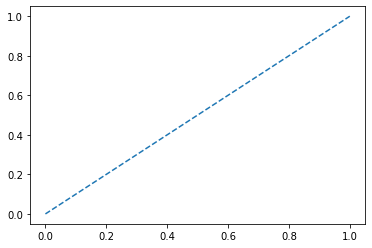

In [47]:

pyplot.plot([0, 1], [0, 1], linestyle='--')


In [48]:
pyplot.plot(fpr, tpr, marker='.')


NameError: name 'fpr' is not defined

In [49]:
pyplot.show()

In [50]:
metrics.auc(fpr, tpr)

NameError: name 'fpr' is not defined